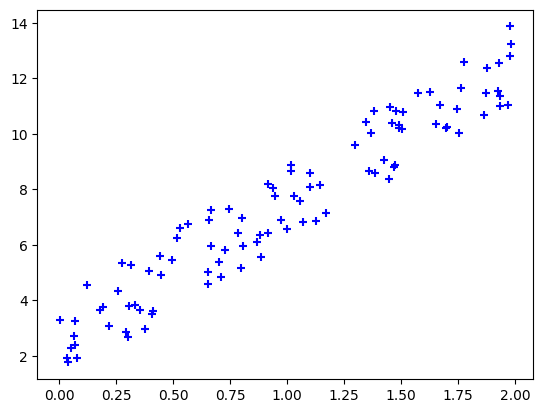

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# 数据准备

np.random.seed(56)
x = 2 * np.random.rand(100,1)
y = 1 + 5 * x + np.random.rand(100,1) * 3

plt.scatter(x,y,marker='+',c='blue')



In [32]:
#数据处理
import torch
from torch.utils.data import DataLoader  # 输入数据和相应标签数据打包为一个数据集对象
from torch.utils.data import TensorDataset   # 加载并预处理数据，同时定义数据采样方式、批量大小

x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float()

dataset = TensorDataset(x,y)

dataloder = DataLoader(dataset,batch_size=16,shuffle=True)

In [33]:
for index,(data,label) in enumerate(dataloder):
    print(f'index:{index},len:{len(data)}')
    print(data)
    print(label)

index:0,len:16
tensor([[0.4136],
        [1.4253],
        [1.1446],
        [1.6684],
        [0.8064],
        [0.3015],
        [1.0184],
        [1.4914],
        [0.2922],
        [1.8731],
        [1.0312],
        [0.0348],
        [0.9749],
        [0.9444],
        [1.9804],
        [0.4463]])
tensor([[ 3.6279],
        [ 9.0445],
        [ 8.1472],
        [11.0388],
        [ 5.9645],
        [ 2.6876],
        [ 8.6741],
        [10.3143],
        [ 2.8732],
        [11.4778],
        [ 7.7573],
        [ 1.9107],
        [ 6.8918],
        [ 7.7682],
        [13.2298],
        [ 4.9043]])
index:1,len:16
tensor([[1.0553],
        [1.2951],
        [0.0660],
        [1.8626],
        [1.6995],
        [1.5077],
        [0.3928],
        [1.4591],
        [0.6556],
        [1.6267],
        [1.3586],
        [0.3131],
        [1.0990],
        [0.0033],
        [0.3055],
        [0.3307]])
tensor([[ 7.5644],
        [ 9.5926],
        [ 2.7319],
        [10.6747],
        [10

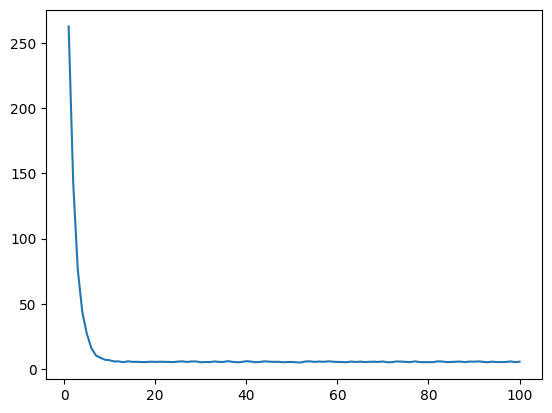

In [34]:
epoch = 100
lr = 0.01
w = torch.randn(1,requires_grad=True)
b = torch.randn(1,requires_grad=True)
Loss = []
for e in range(epoch): # 迭代
    sum_loss = 0 # 代价
    for batch_id,(bx,by) in enumerate(dataloder):
        h = w * bx + b
        loss = torch.mean((by-h)**2) # 代价函数
        sum_loss += loss # 计算每次迭代的代价函数
        loss.backward()
        # 更新参数
        w.data -= lr * w.grad.data
        b.data -= lr * b.grad.data
        # 梯度清零
        w.grad.zero_()
        b.grad.zero_()
    Loss.append(sum_loss.detach())
# plt.scatter(x,y)
L_x = [i for i in range(1,epoch+1)]
plt.plot(L_x,Loss)
plt.show()

[tensor(944.6172), tensor(885.0080), tensor(750.0092), tensor(703.7730), tensor(691.4647), tensor(659.4514), tensor(610.4995), tensor(602.1882), tensor(553.2432), tensor(512.6614), tensor(495.3018), tensor(447.7145), tensor(422.5364), tensor(385.1039), tensor(372.7632), tensor(332.9268), tensor(325.9830), tensor(299.9337), tensor(280.5706), tensor(279.2474), tensor(281.0771), tensor(275.2900), tensor(258.6212), tensor(222.5381), tensor(195.0091), tensor(206.0092), tensor(183.2339), tensor(179.4665), tensor(152.6040), tensor(172.3765), tensor(144.2139), tensor(130.5221), tensor(137.3397), tensor(132.5676), tensor(117.8295), tensor(109.6064), tensor(103.1637), tensor(93.5077), tensor(91.5844), tensor(85.3257), tensor(82.5706), tensor(82.8824), tensor(71.8786), tensor(65.9352), tensor(66.2243), tensor(65.2838), tensor(58.4208), tensor(59.1083), tensor(59.1157), tensor(50.3894), tensor(48.0346), tensor(44.6702), tensor(40.6069), tensor(42.7852), tensor(38.3560), tensor(41.2047), tensor(35.

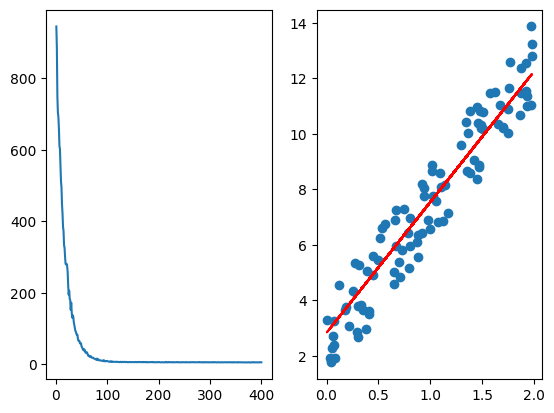

In [35]:
epoch = 400
lr = 0.001
w = torch.randn(1,requires_grad=True).float()
b = torch.randn(1,requires_grad=True).float()
Loss = []

for time in range(1,epoch+1):
    
    sum_cost = 0

    for index,(bx,by) in enumerate(dataloder):
        h = w * bx + b
        cost = torch.mean((by-h)**2)
        sum_cost += cost
        cost.backward()
        
        w.data -= lr * w.grad.data
        b.data -= lr * b.grad.data

        w.grad.zero_()
        b.grad.zero_()

    Loss.append(sum_cost.detach())
    
print(Loss)
L_x = [i for i in range(1,len(Loss)+1)]
plt.subplot(1,2,1)
plt.plot(L_x,Loss)
plt.subplot(1,2,2)
plt.scatter(x,y)
plt.plot(x,w.detach()*x+b.detach(),color='red')

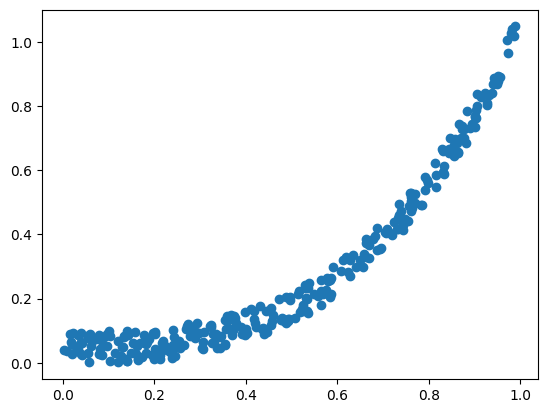

In [36]:
# from math import *

x = np.random.rand(300,1)
y = x**3 + np.random.rand(300,1)*0.1

plt.scatter(x,y)

In [37]:
# 数据准备
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float()
x *= 2

dataset = TensorDataset(x,y)
dataloder = DataLoader(dataset,batch_size=10,shuffle=True)
type(x)

torch.Tensor

In [44]:
w1 = torch.rand(1,requires_grad=True)
w2 = torch.rand(1,requires_grad=True)
w3 = torch.rand(1,requires_grad=True)
w4 = torch.rand(1,requires_grad=True)
b = torch.rand(1,requires_grad=True)
Loss = []
epoch = 1000
lr = 0.005
print(w1)

for time in range(epoch):
    sum_cost = 0
    for index,(bx,by) in enumerate(dataloder):
        print(w1)
        h = w3*bx**3 + w2*bx**2 +w1*bx**1 + b      
        cost = torch.mean((by-h)**2)
        cost.backward()
        # w4.data -= lr * w4.grad.data
        w3.data -= lr * w3.grad.data
        w2.data -= lr * w2.grad.data
        w1.data -= lr * w1.grad.data
        b.data -= lr * b.grad.data

        b.grad.zero_()
        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()

        sum_cost += cost
    # print(w1)
    
    Loss.append(sum_cost.detach())


tensor([0.3806], requires_grad=True)
tensor([0.3806], requires_grad=True)
tensor([0.3546], requires_grad=True)
tensor([0.3244], requires_grad=True)
tensor([0.3052], requires_grad=True)
tensor([0.2903], requires_grad=True)
tensor([0.2829], requires_grad=True)
tensor([0.2738], requires_grad=True)
tensor([0.2601], requires_grad=True)
tensor([0.2485], requires_grad=True)
tensor([0.2400], requires_grad=True)
tensor([0.2318], requires_grad=True)
tensor([0.2245], requires_grad=True)
tensor([0.2190], requires_grad=True)
tensor([0.2145], requires_grad=True)
tensor([0.2077], requires_grad=True)
tensor([0.2022], requires_grad=True)
tensor([0.1989], requires_grad=True)
tensor([0.1950], requires_grad=True)
tensor([0.1908], requires_grad=True)
tensor([0.1874], requires_grad=True)
tensor([0.1852], requires_grad=True)
tensor([0.1836], requires_grad=True)
tensor([0.1823], requires_grad=True)
tensor([0.1797], requires_grad=True)
tensor([0.1760], requires_grad=True)
tensor([0.1732], requires_grad=True)
t

Text(0.5, 1.0, 'cost')

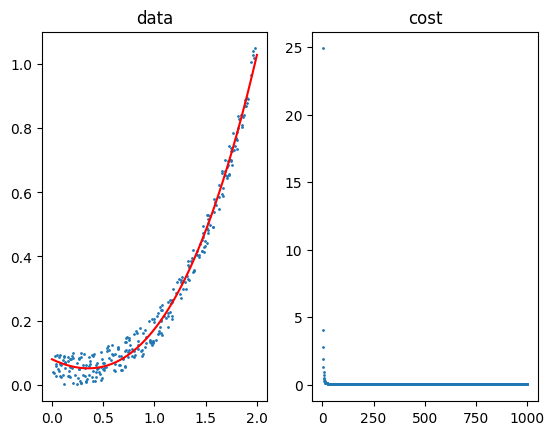

In [45]:
plt.subplot(1,2,1)
plt.scatter(x,y,s=1)
xx = np.linspace(0,2,1000)
plt.plot(xx,w3.detach()*xx**3 + w2.detach()*xx**2 +w1.detach()*xx + b.detach(),color='red')
plt.title('data')

plt.subplot(1,2,2)
Loss_x = [i for i in range(1,len(Loss)+1)]
plt.scatter(Loss_x,Loss,s=1)
plt.title('cost')

In [40]:
type(x)

torch.Tensor